# GRO620 - Activité procédurale 3

In [1]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Filtrage linéaire - suite

### Q1.1

Soit cette image :

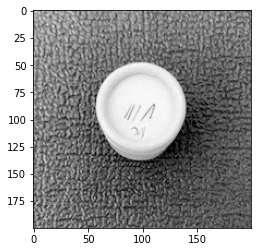

In [2]:
img_q11_org  = cv2.imread("images_doc/proc2-q1-object.jpeg")
img_q11_mono = np.float32(cv2.cvtColor(img_q11_org, cv2.COLOR_BGR2GRAY)) / 255.
plt.imshow(img_q11_mono, cmap="gray")

Utilisez un filtre linéaire de Sobel (voir sections 3.2.1 et 4.2.1) pour faire ressortir les contours de cette image.

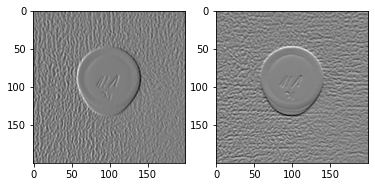

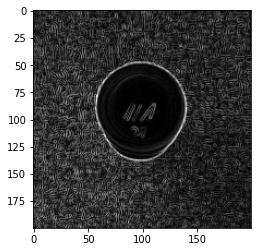

In [3]:
sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]) * (1/8.)

img_filt_x = cv2.filter2D(img_q11_mono, -1, sobel)
img_filt_y = cv2.filter2D(img_q11_mono, -1, sobel.T)

img_filt = np.sqrt(img_filt_x**2 + img_filt_y**2)

plt.subplot(121),plt.imshow(img_filt_x, cmap='gray')
plt.subplot(122),plt.imshow(img_filt_y, cmap='gray')

plt.figure()
plt.imshow(img_filt, cmap='gray')


## Filtrage non-linéaire

### Q2.1

Soit cette image :

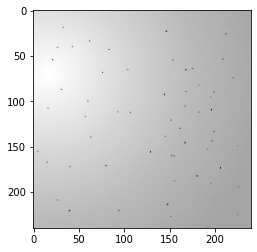

In [4]:
img_q21_org = cv2.imread("images_doc/proc2-q3-sand.png")
img_q21_mono = cv2.cvtColor(img_q21_org, cv2.COLOR_BGR2GRAY)
plt.imshow(img_q21_mono, cmap="gray")

Utilisez un filtre **non-linéaire** pour tenter de retirer les points noirs dans l'image.

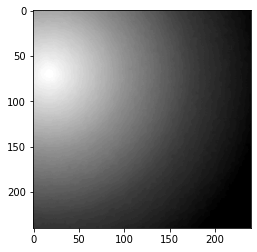

In [13]:
img_q21_filt = cv2.medianBlur(img_q21_mono,5)

plt.imshow(img_q21_filt, cmap='gray')

## Chaîne de filtrage

### Q3.1

En reprenant la figure originale de la question Q1.1, appliquez une succession de filtres pour mieux isoler le contour de l'objet au centre de l'image.

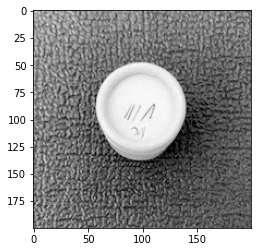

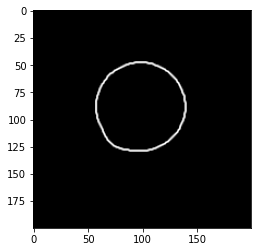

In [38]:
img_q31 = img_q11_mono
plt.figure()
plt.imshow(img_q31, cmap="gray")

img_blur = cv2.medianBlur(img_q31, 5)
_, img_thresh = cv2.threshold(img_blur, 0.67, 255, cv2.THRESH_BINARY)

img_filt_x = cv2.filter2D(img_thresh, -1, sobel)
img_filt_y = cv2.filter2D(img_thresh, -1, sobel.T)

img_filt_q31 = np.sqrt(img_filt_x**2 + img_filt_y**2)

plt.figure()
plt.imshow(img_filt_q31, cmap='gray')


### Q3.2

Répétez l'exercice précédent, mais avec un filtre de Canny.

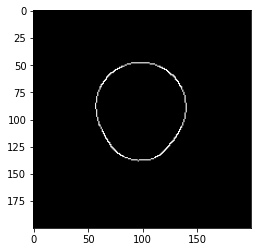

In [52]:
img_q32 = img_q11_org
img_blur = cv2.medianBlur(img_q32, 5)
edges = cv2.Canny(img_blur, 400, 600)

plt.imshow(edges, cmap='gray')

## Analyse de formes

### Q4.1

Soit cette image :

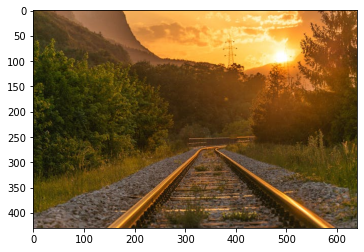

In [8]:
img_q41_org  = cv2.imread("images_doc/proc3-q4-tracks.jpeg")
img_q41_rgb = cv2.cvtColor(img_q41_org, cv2.COLOR_BGR2RGB)
plt.imshow(img_q41_rgb)

(Source de l'image originale : [Krivec Ales, Pexels](https://www.pexels.com/photo/clouds-cloudy-country-distance-552779/))

Trouvez et tracez les lignes dominantes à l'aide de la transformée de Hough.

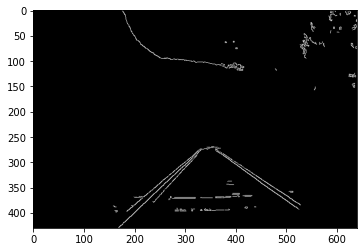

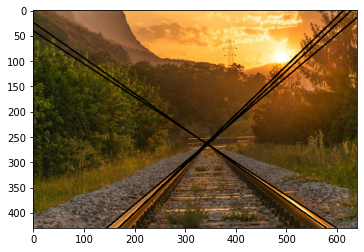

In [63]:
img_q41_mono = cv2.cvtColor(img_q41_rgb, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_q41_mono, 250, 500)
img_lines = img_q41_rgb.copy()

lines = cv2.HoughLines(edges,1,np.pi/180,40)
for line in lines[0:5]:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img_lines,(x1,y1),(x2,y2),(0,0,0),2)
    
plt.figure()
plt.imshow(edges, cmap='gray')

plt.figure()
plt.imshow(img_lines)



### Q4.2

En reprenant l'image des questions Q1.1 et Q3.1, trouvez, tracez et afficher les coordonnées (en pixels) de la boîte (*bounding box*) contenant les contours de l'objet à l'aide de cv2.findContours()

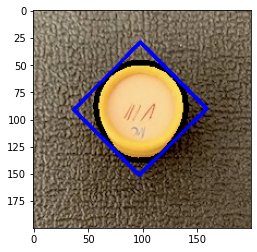

In [69]:
img_q42 = img_q11_org.copy()
img_rgb = cv2.cvtColor(img_q42, cv2.COLOR_BGR2RGB)
img_blur = cv2.medianBlur(img_q42, 5)

# Find edges
edges = cv2.Canny(img_blur, 400, 600)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_cnt = cv2.drawContours(img_rgb.copy(), contours, -1, (0,0,0), 3)

# FInd bounding box
rect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_cnt,[box],0,(0,0,255),2)

plt.imshow(img_cnt)